## Library

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
from dateutil import tz
import re, string
from wordcloud import WordCloud
import pycantonese
import jieba, emoji
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from zhon.hanzi import punctuation

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import snownlp
from snownlp import SnowNLP
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as sia
from transformers import pipeline

In [3]:
from transformers import pipeline
# print(pipeline('sentiment-analysis')('we love you'))

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis.sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim import corpora, models, similarities
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.test.utils import datapath

In [73]:
# index
def dt_now():
    dt_now = str(dt.datetime.now())
    dt_now = dt_now.replace("-","").replace(":","").replace(" ","")
    dt_now = dt_now[0:14]
    return dt_now

message, from, created_time, shares, comments.limit(0).summary(1), reactions.limit(0).summary(1), reactions.type(LIKE).limit(0).summary(1).as(like), reactions.type(LOVE).limit(0).summary(1).as(love), reactions.type(HAHA).limit(0).summary(1).as(haha), reactions.type(WOW).limit(0).summary(1).as(wow), reactions.type(SAD).limit(0).summary(1).as(sad), reactions.type(ANGRY).limit(0).summary(1).as(angry)

In [ ]:
# import json # import csv # from nltk.corpus import stopwords

# # Drop not-using columns
# not_using_col = ["id", "parent_id", "level", "object_id", "query_status", "query_time", "query_type",
#                 "paging.cursors.before", "paging.cursors.after", "paging.next", "reactions.summary.viewer_reaction",
#                 "sad.summary.viewer_reaction", "angry.data", "angry.summary.viewer_reaction", "updated_time", "error.message",
#                 "reactions.data", "id.1", "like.summary.total_count", "like.summary.viewer_reaction", "sad.data",
#                 "error.type", "error.code", "error.fbtrace_id", "from.name", "from.id", "like.data", "object_key", 
#                 "object_type", "reactions.summary.total_count", "sad.summary.total_count", "angry.summary.total_count"]
# df.drop(columns = not_using_col, inplace=True)

## 1. Clean df

In [ ]:
#*********************************
Bank_name = 'ZA'
#*********************************

Filename = f'{Bank_name}_Facebook_Bank.csv'
New_Filename = f'Final_{Bank_name}_Facebook.csv'

df = pd.read_csv(f'Collected_data/FB_Weibo_Bank/{Filename}', header=0, encoding ="utf-8-sig")

In [ ]:
# Drop non-data and NaN messages
drop_index = df[df.object_type != "data"].index
df.drop(axis = 0, index = drop_index, inplace = True)

drop_index = df[df.message.isna()].index
df.drop(axis = 0, index = drop_index, inplace = True)

In [ ]:
def na_to_zero(column):
    return column.replace(np.nan,"0").apply(lambda x: int(x))

In [ ]:
# Replace NaN with zero
# Change of column type to int
col_to_transform = ["shares.count", "comment_count", "like_count", "comments.summary.total_count",
                   "reactions.summary.total_count", "sad.summary.total_count", "angry.summary.total_count"]

for i in range(len(col_to_transform)):
    df[col_to_transform[i]] = na_to_zero(df[col_to_transform[i]])

In [ ]:
# Categorization of reactions
df['pos_reaction'] = (df['reactions.summary.total_count'] + df['like_count']
                      - df['sad.summary.total_count'] - df['angry.summary.total_count'])
df['neg_reaction'] = df['sad.summary.total_count'] + df['angry.summary.total_count']
df['comments'] = df['comment_count'] + df['comments.summary.total_count']

df = df.rename(columns = {'shares.count' : 'shares', 'from.name' : 'author'})

In [ ]:
# Datetime
df["created_time"] = pd.to_datetime(df["created_time"])
df["date"] = df["created_time"].apply(lambda x: x.date())
df["date"] = pd.to_datetime(df["date"])

In [ ]:
df.head(2)

In [ ]:
# Add bank name
df["bank"] = Bank_name

In [ ]:
df = df.reindex(columns = ['bank','level','id','parent_id','date','author','created_time','message',
                           'pos_reaction','neg_reaction','shares','comments'])

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head(3)

In [ ]:
# Double-checking
display(df[df["neg_reaction"] < 0])
display(df[df["pos_reaction"] < 0])

In [ ]:
df.info()

In [ ]:
# df.to_csv(f'Collected_data/FB_Weibo_Bank/{New_Filename}', encoding='utf-8-sig', index=False)

## 2. Concat df

In [ ]:
df_1 = pd.read_csv('Collected_data/FB_Weibo_Bank/Final_ZA_Facebook.csv', header=0, encoding='utf-8-sig')
df_2 = pd.read_csv('Collected_data/FB_Weibo_Bank/Final_AIR_Facebook.csv', header=0, encoding='utf-8-sig')
df_3 = pd.read_csv('Collected_data/FB_Weibo_Bank/Final_BEA_Facebook.csv', header=0, encoding='utf-8-sig')
df_4 = pd.read_csv('Collected_data/FB_Weibo_Bank/Final_CCB_Facebook.csv', header=0, encoding='utf-8-sig')
df_5 = pd.read_csv('Collected_data/FB_Weibo_Bank/Final_CITI_Facebook.csv', header=0, encoding='utf-8-sig')
df_6 = pd.read_csv('Collected_data/FB_Weibo_Bank/Final_CNCBI_Facebook.csv', header=0, encoding='utf-8-sig')
df_7 = pd.read_csv('Collected_data/FB_Weibo_Bank/Final_DBS_Facebook.csv', header=0, encoding='utf-8-sig')
df_8 = pd.read_csv('Collected_data/FB_Weibo_Bank/Final_HSBC_Facebook.csv', header=0, encoding='utf-8-sig')
df_9 = pd.read_csv('Collected_data/FB_Weibo_Bank/Final_ICBC_Facebook.csv', header=0, encoding='utf-8-sig')
df_10 = pd.read_csv('Collected_data/FB_Weibo_Bank/Final_LIVI_Facebook.csv', header=0, encoding='utf-8-sig')
df_11 = pd.read_csv('Collected_data/FB_Weibo_Bank/Final_MOX_Facebook.csv', header=0, encoding='utf-8-sig')
df_12 = pd.read_csv('Collected_data/FB_Weibo_Bank/Final_SC_Facebook.csv', header=0, encoding='utf-8-sig')
df_13 = pd.read_csv('Collected_data/FB_Weibo_Bank/Final_WELAB_Facebook.csv', header=0, encoding='utf-8-sig')
df_14 = pd.read_csv('Collected_data/FB_Weibo_Bank/Final_WH_Facebook.csv', header=0, encoding='utf-8-sig')
df_15 = pd.read_csv('Collected_data/FB_Weibo_Bank/Final_DS_Facebook.csv', header=0, encoding='utf-8-sig')

In [ ]:
# Concat all df
frames = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13, df_14, df_15]  
df_master = pd.concat(frames, ignore_index=True)

In [ ]:
display(df_master)

In [ ]:
df_master.info()

In [ ]:
df_master.groupby(by=['bank'])["level"].value_counts()

In [ ]:
stat = df_master["bank"].value_counts()
type(stat)

In [ ]:
# stat.to_csv('Collected_data/FB_Weibo_Bank/Stat2_ALL_Facebook.csv')

In [ ]:
# df_master.to_csv('Collected_data/FB_Weibo_Bank/Final_ALL_Facebook.csv', encoding='utf-8-sig', index=False)

## 3. Word Cloud

In [ ]:
#*********************************
bank_abbev = "BEA"
df = pd.read_csv(f'Collected_data/FB_Weibo_Bank/FB_{bank_abbev}_2022_v2.csv', encoding ="utf-8-sig")
#*********************************

# index
dt_now = str(dt.datetime.now())
dt_now = dt_now.replace("-","").replace(":","").replace(" ","")
dt_now = dt_now[0:14]

In [ ]:
# Remove URL
df_noURL = df.message.apply(lambda x: re.sub(r'http\S+', '', x))

In [ ]:
jieba.set_dictionary('dict.txt.big.txt')

In [ ]:
# Word tokenization

# Combine all rows together for easier process
post_ALL = ''.join(df_noURL)

# Word tokens with length larger than 1
post_ALL_token = jieba.lcut(post_ALL, cut_all=True)
post_ALL_token_2 = [word for word in post_ALL_token if len(word.strip())>1]
word_list = " ".join(post_ALL_token_2)

In [ ]:
# Stopwords
# Cantonese
stop_words = pycantonese.stop_words()

# TC Stopwords
tc_stopwords = pd.read_csv("tc_stopwords.txt", header=None)
tc_stopwords = set(tc_stopwords[0])

# Eng Stopwords
eng_stopwords = stopwords.words('english')

# Additional stopwords
add_stopwd = set(["HKD", "ZA", "ZABank", "ZA Bank", "Bank", "BEA", "HSBC", "ICBC", "DBS", "SC", "HK", "Hong", "Kong", "com",
                  "香港", "眾安", "星展", "渣打", "東亞", "東亞銀行", "匯豐", "工銀", "有限公司", "銀行", "DBSHK"])

# Combine stopwords
tc_stopwords_union = tc_stopwords.union(stop_words, add_stopwd, eng_stopwords)

In [ ]:
wordcloud = WordCloud(width = 500, height = 500,
                      font_path="simsun.ttf",
                      background_color ='white',
                      stopwords = tc_stopwords_union,
                      collocations=False,
                      min_font_size = 15).generate(word_list)

# plot the WordCloud image                      
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig(f'Bank_Wordcloud/{bank_abbev}_{dt_now}.png')
plt.show()

In [ ]:
# makes the circle using numpy
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(width = 800, height = 800,
                      font_path="simsun.ttf",
                      background_color ='white',
                      stopwords = tc_stopwords_union,
                      mask = mask,
                      min_font_size = 10).generate(mytext_ALL_list)

# index
dt_now = str(dt.datetime.now())
dt_now = dt_now.replace("-","").replace(":","").replace(" ","")
dt_now = dt_now[0:14]

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig(f'Bank_Wordcloud/ZA_{dt_now}.png')
plt.show()

## 4. Sklearn LDA (Topic Modelling)

### 4.1 Sample

In [ ]:
df = pd.read_csv("Test_LDA_TopicModelling/datascience.csv", encoding='gb18030')

In [ ]:
df.head(3)

<b>Word Tokenization using Jieba</b>

In [ ]:
def chinese_word_cut(mytext):
    return " ".join(jieba.cut(mytext))

df["content_cutted"] = df.content.apply(chinese_word_cut)
df.content_cutted.head()

<b>Word Vectorization using TFIDF</b>

In [ ]:
# Avoid extracting ALL keywords from the text
n_features = 1000
tf_vectorizer = CountVectorizer(strip_accents='unicode',
                                max_features=n_features,
                                stop_words='english',
                                # Ignore terms that have a document frequency > or < than the threshold
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(df.content_cutted)

<b>Apply LDA to train the model</b>

In [ ]:
# Need to self define no. of topics
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, 
                                max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)

In [ ]:
# Print top words of each topics
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [ ]:
# Set how many top words to get for each topic
n_top_words = 20

tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

### 4.2 Facebook posts

In [ ]:
bank_abbev = "ALL"
df = pd.read_csv(f'Collected_data/FB_Weibo_Bank/FBClean_{bank_abbev}_v2.csv', encoding='utf-8-sig', header=0)

In [ ]:
df.head(3)

<b>Cantonese Stopwords</b>

In [ ]:
# Stopwords
# Cantonese
stop_words = pycantonese.stop_words()

# TC Stopwords
tc_stopwords = pd.read_csv("tc_stopwords.txt", header=None)
tc_stopwords = set(tc_stopwords[0])

# Eng Stopwords
eng_stopwords = stopwords.words('english')

# Additional stopwords
add_stopwd = set(["HKD", "ZA", "ZABank", "ZA Bank", "Bank", "BEA", "HSBC", "ICBC", "DBS", "SC", "HK", "Hong", "Kong", "com", "bit", "亞銀", "閣下",
                  "香港", "眾安", "星展", "渣打", "東亞", "東亞銀行", "匯豐", "工銀", "有限公司", "銀行", "DBSHK", "html", "conditions", "terms", "ly",
                  'bank', 'bea', 'dbs', 'dbshk', 'hk', 'hkd', 'hong', 'hsbc', 'icbc', 'kong', 'sc', 'za', 'zabank', "condition", "term", '若果',
                  "grp"])

# Combine stopwords
tc_stopwords_union = tc_stopwords.union(stop_words, add_stopwd, eng_stopwords)

<b>Word Tokenization using Jieba</b>

In [ ]:
jieba.set_dictionary('dict.txt.big.txt')

In [ ]:
def chinese_word_cut(mytext):
    # Jieba - Word tokenization
    word_list = jieba.lcut(mytext, cut_all=True)
    word_list = [word for word in word_list if len(word.strip())>1]
    word_list = [i for i in word_list if not i.isdigit()]
    word_list = " ".join(word_list)
    
    # Remove punctuation marks
    word_list = word_list.translate(str.maketrans('', '', string.punctuation)) # English
    word_list = word_list.translate(str.maketrans('', '', punctuation)) # Chinese
    
    # Remove emojis
    word_list = emoji.get_emoji_regexp().sub(u'', word_list)
    return word_list

df["content_cutted"] = df.message.apply(chinese_word_cut)
df.content_cutted.head()

<b>Word Vectorization using TFIDF</b>

In [ ]:
# Avoid extracting ALL keywords from the text
n_features = 1000
tf_vectorizer = CountVectorizer(strip_accents='unicode',
                                max_features=n_features,
                                stop_words=tc_stopwords_union,
                                # Ignore terms that have a document frequency > or < than the threshold
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(df.content_cutted)

<b>Apply LDA to train the model</b>

In [ ]:
# Need to self define no. of topics
n_topics = 7
lda = LatentDirichletAllocation(n_components=n_topics, 
                                max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)

In [ ]:
# Print top words of each topics
def print_top_words(model, feature_names, n_top_words):
    print(bank_abbev, "Bank Topics:\n")
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [ ]:
# Set how many top words to get for each topic
n_top_words = 20

tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)

In [ ]:
lda.components_[1]

In [ ]:
# index
dt_now = str(dt.datetime.now())
dt_now = dt_now.replace("-","").replace(":","").replace(" ","")
dt_now = dt_now[0:14]

pyLDAvis.enable_notebook()
p = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
pyLDAvis.save_html(p, f'Test_LDA_TopicModelling/LDA_{bank_abbev}_{dt_now}.html')

## 5. Gensim LDA (Topic Modelling)

<b>Assign topics to ALL Facebook posts and comments</b>

In [ ]:
bank_abbev = "ALL"
df = pd.read_csv(f'Collected_data/Final_{bank_abbev}_Facebook.csv', encoding='utf-8-sig', header=0)

In [ ]:
display(df.head(3))

In [131]:
stopword_list = []

with open("tc_stopwords_union.txt", 'r',encoding='utf-8-sig') as f:
    for data in f.readlines():
        stopword_list.append(data.strip())

In [132]:
stopword_list[0:10]

['0', '大家', '來自', '乜嘢', '譬喻', 'because', '所以', '連同', '嘍', '成日']

In [133]:
def _filter(word):
    extra_stoplist = ['\n', ' ', '\xa0', '─', '', 'https', 'http']
    if word in stopword_list + extra_stoplist:
        return False
    elif (len(word) > 1) & (~word.isdigit()):
        return True

def chinese_word_cut(mytext):
    # Jieba - Word tokenization
#     word_list = jieba.cut(mytext, cut_all=False)
    word_list = list(filter(_filter, jieba.cut(mytext)))
#     word_list = [word for word in word_list if len(word.strip())>1]
#     word_list = [i for i in word_list if not i.isdigit()]
#     word_list = " ".join(word_list)
    
#     # Remove punctuation marks
#     word_list = word_list.translate(str.maketrans('', '', string.punctuation)) # English
#     word_list = word_list.translate(str.maketrans('', '', punctuation)) # Chinese
    
#     # Remove emojis
#     word_list = emoji.get_emoji_regexp().sub(u'', word_list)
    return word_list

[chinese_word_cut(x) for x in df.message[0:5]]


# df["content_cutted"] = df.message.apply(chinese_word_cut)
# df.content_cutted.head()

[['好友',
  '齊齊',
  '美容',
  '按摩',
  '項目',
  '買一送一',
  '所謂',
  '休息',
  '更遠',
  '工作',
  '適時',
  '放鬆',
  '一下',
  'Card',
  '特選',
  '商戶',
  '水療',
  '按摩',
  '美容',
  '買一送一',
  '朋友',
  '一齊',
  'relax',
  '身心',
  '重新',
  '注入',
  '能量',
  '出發',
  'Miris',
  'Spa',
  '岩石',
  '按摩',
  '專門店',
  '岩鹽',
  '熱石',
  '身體',
  '排毒',
  '抗疲',
  '適合',
  '孕婦',
  '舒緩',
  '按摩',
  '護理',
  '為身',
  '得到',
  '全面',
  '放鬆',
  'Spa',
  'Sanctuary',
  '提供',
  '多款',
  '按摩',
  '面部',
  '療程',
  '全面',
  '提升',
  '能量',
  '精神飽滿',
  'OUT',
  'OF',
  'COLOURS',
  'Beauty',
  '要望',
  '落夠',
  '點少',
  '一枝',
  '唇膏',
  '亞洲',
  '首創',
  '唇膏',
  '體驗',
  '造型',
  '獨一無二',
  '唇色',
  '仲有',
  '特選',
  '商戶',
  '美容',
  '按摩',
  '項目',
  '買一送一',
  '詳情',
  '3SNzVUe',
  '另一半',
  'spa',
  '屋企',
  '閨密',
  '扮靚靚',
  'ZACard',
  '-------',
  '即日',
  'Card',
  '特選',
  '商戶',
  '購買',
  '指定',
  '美容',
  '項目',
  '即享',
  '買一送一',
  '優惠',
  '優惠',
  '特選',
  '商戶',
  '提供',
  '使用',
  '條件',
  '包括',
  '限於',
  '美容',
  '項目',
  '種類',
  '價錢',
  '優惠',
  '享用',
  '時間',
  '使用',
  '方式

In [134]:
document = [chinese_word_cut(x) for x in df.message]
# document = [df.message.apply(lambda x: chinese_word_cut(x))]
print(type(document), len(document))

<class 'list'> 33100


In [135]:
dictionary = Dictionary(document)

In [136]:
# Token frequency
# dictionary.dfs

詞袋(BOW, bag of word)，轉換成詞袋之後的好處是方便進行LDA模型訓練，但詞袋模型的缺點是不考慮詞跟詞的連接的順序，因而大幅簡化了原文本。

In [137]:
corpus = [dictionary.doc2bow(text) for text in document]

In [148]:
lda = LdaModel(corpus,
               id2word=dictionary,
               num_topics=6,
               random_state=100,
               update_every=1,
               chunksize=100,
               passes=5,
               alpha='auto',
               per_word_topics=True)

In [149]:
lda.print_topics()

[(0,
  '0.256*"答案" + 0.228*"知多少" + 0.025*"Mox" + 0.019*"得獎者" + 0.010*"參與" + 0.009*"Apple" + 0.009*"智郵站" + 0.009*"郵政局" + 0.008*"得獎" + 0.008*"領獎"'),
 (1,
  '0.034*"優惠" + 0.032*"現金" + 0.022*"貸款" + 0.022*"獎賞" + 0.020*"高達" + 0.020*"消費" + 0.019*"申請" + 0.018*"回贈" + 0.017*"專人" + 0.015*"成功"'),
 (2,
  '0.070*"理財" + 0.044*"有獎" + 0.043*"日常" + 0.043*"輕鬆" + 0.018*"服務" + 0.013*"客戶" + 0.010*"目標" + 0.010*"儲蓄" + 0.009*"外幣" + 0.008*"建議"'),
 (3,
  '0.060*"banking" + 0.029*"Wong" + 0.022*"Lam" + 0.019*"健康" + 0.011*"Ng" + 0.010*"Wai" + 0.010*"推薦" + 0.008*"中小" + 0.007*"YNWA" + 0.006*"Ming"'),
 (4,
  '0.053*"Chan" + 0.019*"意食" + 0.017*"Lee" + 0.016*"Cheung" + 0.013*"Chow" + 0.012*"Wing" + 0.012*"Leung" + 0.011*"Yan" + 0.010*"沙律" + 0.010*"Lau"'),
 (5,
  '0.094*"問答" + 0.073*"投資" + 0.064*"Banking" + 0.038*"風險" + 0.019*"外匯" + 0.015*"證券" + 0.014*"涉及" + 0.012*"買賣" + 0.011*"聲明" + 0.009*"資金"')]

In [150]:
# index
dt_now = str(dt.datetime.now())
dt_now = dt_now.replace("-","").replace(":","").replace(" ","")
dt_now = dt_now[0:14]

In [151]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, mds='mmds')
p

C:\Users\user\Documents\Anaconda\envs\yourenvname\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.194476  0.329305       1        1  32.578072
1      0.363150  0.015422       2        1  22.487495
3     -0.349115 -0.014121       3        1  15.243956
4      0.184448 -0.350107       4        1  13.005045
5      0.172898  0.328651       5        1  11.189259
0     -0.176906 -0.309150       6        1   5.496172, topic_info=      Term          Freq         Total Category  logprob  loglift
11242   答案   8803.000000   8803.000000  Default  30.0000  30.0000
49045  知多少   8566.000000   8566.000000  Default  29.0000  29.0000
219     理財  14329.000000  14329.000000  Default  28.0000  28.0000
15735   問答   6619.000000   6619.000000  Default  27.0000  27.0000
140     投資   5090.000000   5090.000000  Default  26.0000  26.0000
...    ...           ...           ...      ...      ...      ...
39587  券乙張    217.434026    245.512310   Topic6  -5.0636   2.7797
4848    將以    173.715094    222.105843   Topic6  -5.2880   2.6554
103     參加    262.607077    505.434937   Topic6  -4.8748   2.2464
101     分享    196.992073    384.870308   Topic6  -5.1623   2.2314
48774   大新    185.953509   2172.212752   Topic6  -5.2200   0.4431

[265 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
47132      1  0.026044  36zNeop
47132      2  0.006511  36zNeop
47132      4  0.006511  36zNeop
47132      6  0.957119  36zNeop
47133      1  0.026044  3IR7Mpu
...      ...       ...      ...
3621       6  0.998180       領獎
157        2  0.998903       額外
158        5  0.999707       風險
4166       5  0.998344       高息
159        2  0.999780       高達

[333 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 5, 6, 1])

In [152]:
pyLDAvis.save_html(p, f'Test_LDA_TopicModelling/LDA_{bank_abbev}_{dt_now}.html')

## 6. Sentiment Analysis

<b>Pre- and Post-training Performance Comparison</b>

In [5]:
# ALL comment data
df = pd.read_excel("FacebookComment_with_Remarks.xlsx")
df = df.rename(columns = {' ' : 'id'})

print(df.shape)
display(df.head(2))

(31571, 11)


,bank,id,parent_id,date,author,message,remarks,pos_reaction,neg_reaction,shares,comments
0,ZA,28684,25492,2022-10-07,NaN,📢 真心分享：立即下載及申請 ZA Bank！用最新邀請碼 C943N3成功申請 用ZA ...,Sharing,0,0,0,0
1,ZA,28685,25492,2022-10-07,NaN,📢 真心分享：立即下載及申請 ZA Bank！用 最新邀請碼 L44838 開戶 可以獲得 ...,Sharing,0,0,0,0


In [6]:
# Drop bank's comments
bank_author = ['ZA Bank', 'Airstar Bank', 'BEA 東亞銀行', 'CCB Asia 中國建設銀行（亞洲）',
       'Citi Hong Kong', '中信銀行(國際) China CITIC Bank International', 'DBS', 'HSBC', 
       'ICBC （Asia）', 'livi bank', 'Mox Bank', 'Standard Chartered Hong Kong',
       'WeLab Bank', 'OCBC Wing Hang', 'Dah Sing Bank 大新銀行']
index_drop = df[df.author.isin(bank_author)].index
df_comments = df.drop(index = index_drop)
print(df_comments.shape)

# Drop non-relevant comments (e.g., Sharing and answering questions)
index_drop_2 = df_comments[~df_comments.remarks.isna()].index
df_comments = df_comments.drop(index = index_drop_2)
print(df_comments.shape)

df_comments = df_comments.drop(columns=['author', 'remarks']).reset_index(drop=True)
print(df_comments.shape)

(29254, 11)
(12160, 11)
(12160, 9)


In [7]:
display(df_comments.head(2))

,bank,id,parent_id,date,message,pos_reaction,neg_reaction,shares,comments
0,ZA,28711,25495,2022-10-01,點申請卡？,0,0,0,1
1,ZA,28720,25496,2022-09-26,為什麼要寶靈大廈7-11，不能全港7-11？,4,0,0,0


<b>Training Set</b>

In [8]:
# Training set for Sentiment Analysis
train_df = pd.read_csv("training_senti_comments.csv")
train_df.sentiment = train_df.sentiment.map({1:'Negative',
                                             2: 'Negative',
                                             3: 'Neutral',
                                             4: 'Positive',
                                             5: 'Positive'})
display(train_df.head(2))

# Set X and y variables
X = train_df[["id"]].values
y = train_df['sentiment'].values
print(X.shape, y.shape)

# Random train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

,id,sentiment
0,28711,Neutral
1,28720,Negative


(837, 1) (837,)
(669, 1) (168, 1) (669,) (168,)


In [9]:
train_all = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1, ignore_index=True)
train_all = train_all.rename(columns = {0:'id', 1:'sentiment'})
train_all = train_all.sort_values(by=['id']).reset_index(drop=True)

test_all = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1, ignore_index=True)
test_all = test_all.rename(columns = {0:'id', 1:'sentiment'})
test_all = test_all.sort_values(by=['id']).reset_index(drop=True)

In [10]:
# df_comments_training = df_comments[df_comments.id.isin(train_df["id"].values)].sort_values(by=['id']).reset_index(drop=True)

In [11]:
train_all = train_all.merge(df_comments[['id', 'message']], on='id', how='left')
test_all = test_all.merge(df_comments[['id', 'message']], on='id', how='left')
print(train_all.shape, test_all.shape)

(669, 3) (168, 3)


### 6.1 [Pre] Vader Sentiment

In [29]:
# Vader Sentiment
analyzer = SentimentIntensityAnalyzer()

sentiment = df_comments_training['message'].apply(lambda x: analyzer.polarity_scores(x))
data = pd.concat([df_comments_training, sentiment.apply(pd.Series)],axis=1)
data = data.rename(columns={'neg': 'vader_neg', 
                            'neu': 'vader_neu', 
                            'pos': 'vader_pos',
                            'compound': 'vader_selfdef'})
# data.drop(columns = ["vader_neg", "vader_neu", "vader_pos"], inplace = True)
display(data.head(2))

,bank,id,parent_id,date,message,pos_reaction,neg_reaction,shares,comments,vader_neg,vader_neu,vader_pos,vader_selfdef
0,ZA,28711,25495,2022-10-01,點申請卡？,0,0,0,1,0.0,1.0,0.0,0.0
1,ZA,28720,25496,2022-09-26,為什麼要寶靈大廈7-11，不能全港7-11？,4,0,0,0,0.0,1.0,0.0,0.0


### 6.2 [Pre] SnowNLP

In [8]:
def senti(x):
    if x > 0.55: 
        return 'Positive'
    elif x < 0.45:
        return 'Negative'
    else: 
        return'Neutral'

###### Training set (Pre)

In [19]:
train_all['senti_pretrain'] = train_all.message.apply(lambda x: SnowNLP(x).sentiments)
train_all['senti_pretrain'] = train_all['senti_pretrain'].apply(senti)

train_all.senti_pretrain.value_counts()

Negative    408
Positive    206
Neutral      55
Name: senti_pretrain, dtype: int64

0.5142002989536621


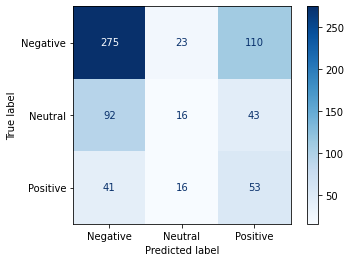

In [20]:
y_true = train_all.sentiment.values
y_pred = train_all.senti_pretrain.values

evaluation_NLP(y_true, y_pred)

###### Testing set (Pre)

In [21]:
test_all['senti_pretrain'] = test_all.message.apply(lambda x: SnowNLP(x).sentiments)
test_all['senti_pretrain'] = test_all['senti_pretrain'].apply(senti)

test_all.senti_pretrain.value_counts()

Negative    100
Positive     53
Neutral      15
Name: senti_pretrain, dtype: int64

0.47023809523809523


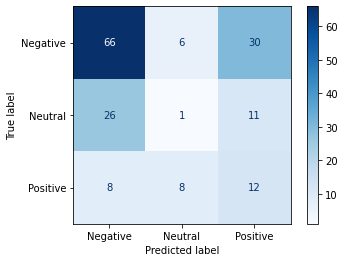

In [22]:
y_true = test_all.sentiment.values
y_pred = test_all.senti_pretrain.values

evaluation_NLP(y_true, y_pred)

###### ALL (Pre)

In [25]:
subset_all = pd.concat([train_all, test_all], ignore_index=True)

0.5053763440860215


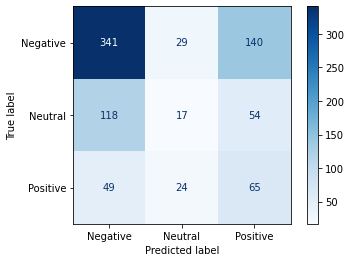

In [26]:
y_true = subset_all.sentiment.values
y_pred = subset_all.senti_pretrain.values

evaluation_NLP(y_true, y_pred)

### <div class="alert alert-block alert-info"> 6.3 Train SnowNLP </div>

In [11]:
def senti(x):
    if x > 0.55: 
        return 'Positive'
    elif x < 0.45:
        return 'Negative'
    else: 
        return'Neutral'

In [12]:
def evaluation_NLP(y_true, y_pred):
    labels = ["Negative", "Neutral", "Positive"]
    # Pre-training accuracy
    print(accuracy_score(y_true = y_true, y_pred = y_pred))
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred, labels=labels),
                           display_labels=labels).plot(cmap=plt.cm.Blues)
    plt.show()

###### Train SnowNLP model

In [228]:
# pos = training_set[training_set.sentiment == "Positive"].index
# neg = training_set[training_set.sentiment == "Negative"].index
# print(len(pos), len(neg))

In [166]:
# pos_df = data_train.iloc[pos]
# neg_df = data_train.iloc[neg]

In [174]:
# np.savetxt("training_pos.txt", pos_df.message.values, fmt="%s", encoding="utf_8_sig")
# np.savetxt("training_neg.txt", neg_df.message.values, fmt="%s", encoding="utf_8_sig")

In [195]:
# snownlp.sentiment.train("training_neg.txt", "training_pos.txt")
# snownlp.sentiment.save('sentiment_updated.marshal')

###### Train Set (Post - Bank dataset)

In [13]:
train_all['senti_trained'] = train_all.message.apply(lambda x: SnowNLP(x).sentiments)
train_all['senti_trained'] = train_all['senti_trained'].apply(senti)

train_all.senti_trained.value_counts()

Negative    408
Positive    206
Neutral      55
Name: senti_trained, dtype: int64

0.5142002989536621


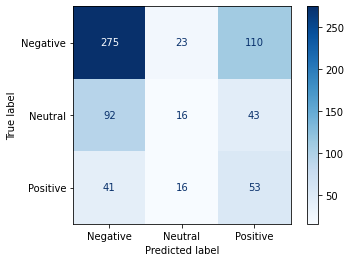

In [14]:
y_true = train_all.sentiment.values
y_pred = train_all.senti_trained.values

evaluation_NLP(y_true, y_pred)

###### Test Set (Post - Bank dataset)

In [15]:
test_all['senti_trained'] = test_all.message.apply(lambda x: SnowNLP(x).sentiments)
test_all['senti_trained'] = test_all['senti_trained'].apply(senti)

test_all.senti_trained.value_counts()

Negative    100
Positive     53
Neutral      15
Name: senti_trained, dtype: int64

0.47023809523809523


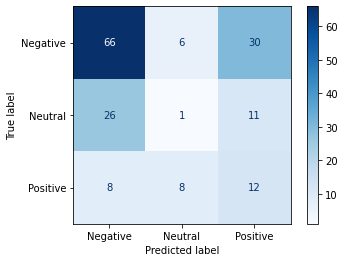

In [16]:
y_true = test_all.sentiment.values
y_pred = test_all.senti_trained.values

evaluation_NLP(y_true, y_pred)

In [27]:
# train_all.to_csv("train_all_snownlp.csv", index=False)
# test_all.to_csv("test_all_snownlp.csv", index=False)

#### 6.3.1 Further train SnowNLP using external training dataset
- Hotel review
- Food Delivery
- Weibo comments

In [35]:
# temp = pd.read_csv(r'C:\Users\user\Desktop\CNCBI_Data_Mining_Project\ChineseNlpCorpus-master\ChineseNlpCorpus-master\datasets\weibo_senti_100k\weibo_senti_100k.csv',
#                   header=0)

In [38]:
# np.savetxt("pos_temp.txt", temp[temp.label == 1].review.values, fmt="%s", encoding="utf_8_sig")

In [4]:
# snownlp.sentiment.train("training_neg_v2.txt", "training_pos_v2.txt")
# snownlp.sentiment.save('sentiment_updated_v2.marshal')

In [3]:
train_all = pd.read_csv("train_all_2.csv", header=0)
test_all = pd.read_csv("test_all_2.csv", header=0)

In [8]:
# test_all.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"], inplace=True)

###### Train Set (Post - Multiple dataset)

In [6]:
train_all['senti_trained_v2'] = train_all.message.apply(lambda x: SnowNLP(x).sentiments)
train_all['senti_trained_v2'] = train_all['senti_trained_v2'].apply(senti)

train_all.senti_trained_v2.value_counts()

Negative    591
Positive     68
Neutral      10
Name: senti_trained_v2, dtype: int64

0.7040358744394619


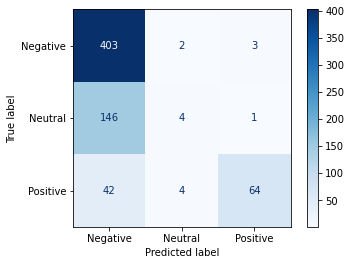

In [54]:
y_true = train_all.sentiment.values
y_pred = train_all.senti_trained_v2.values

evaluation_NLP(y_true, y_pred)

###### Test Set (Post - Multiple dataset)

In [8]:
test_all['senti_trained_v2'] = test_all.message.apply(lambda x: SnowNLP(x).sentiments)
test_all['senti_trained_v2'] = test_all['senti_trained_v2'].apply(senti)

test_all.senti_trained_v2.value_counts()

Negative    154
Positive      9
Neutral       5
Name: senti_trained_v2, dtype: int64

0.6547619047619048


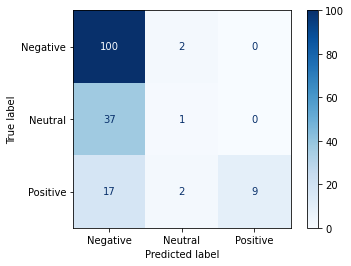

In [55]:
y_true = test_all.sentiment.values
y_pred = test_all.senti_trained_v2.values

evaluation_NLP(y_true, y_pred)

In [13]:
# train_all.to_csv("train_all_2.csv", index=False)
# test_all.to_csv("test_all_2.csv", index=False)

## 7. Topic Distribution

### 7.1 Clean manual assigned topic df

In [79]:
df = pd.read_excel("Collected_data/Final_ALL_Facebook_Topic_Assignment_Completed.xlsx", header=0)
df.columns = df.columns.str.replace(" ", "_")
df = df.drop(columns=["Unnamed:_17"])

In [80]:
df.columns

Index(['bank', 'id', 'date', 'message', 'pos_reaction', 'neg_reaction',
       'shares', 'comments', 'Deposits', 'Foreign_Exchange', 'Acquisition',
       'Loan', 'Mortgages', 'Credit_Cards', 'Investments', 'Insurance',
       'Payment_and_Transfer', 'Branch', 'MPF', 'WM', 'Education', 'Rebate',
       'Beauty', 'Lucky_Draw', 'Travel', 'Bill_Payment', 'Food_and_drinks',
       'Rewards', 'Salary', 'Shopping_and_Entertainment', 'Transport',
       'Health_and_Wellness', 'Event_and_Festival',
       'Celebrity_and_Influencers', 'Award', 'Community', 'Green',
       'Consumption_Voucher', 'Metaverse_and_NFT', 'Promotion', 'Reminder',
       'News', 'Remarks'],
      dtype='object')

In [81]:
# Fill NaN with zero
fillna_columns = df.isna().sum()[df.isna().sum() > 0].index
df[fillna_columns] = df[fillna_columns].fillna(0)

In [82]:
map_columns = ['Deposits', 'Foreign_Exchange', 'Acquisition', 'Loan', 'Mortgages', 'Credit_Cards', 
               'Investments', 'Insurance', 'Payment_and_Transfer', 'Branch', 'MPF', 'WM', 'Education', 'Rebate',
               'Beauty', 'Lucky_Draw', 'Travel', 'Bill_Payment', 'Food_and_drinks',
               'Rewards', 'Salary', 'Shopping_and_Entertainment', 'Transport',
               'Health_and_Wellness', 'Event_and_Festival',
               'Celebrity_and_Influencers', 'Award', 'Community', 'Green',
               'Consumption_Voucher', 'Metaverse_and_NFT']

for i in range(len(map_columns)):
    df[map_columns[i]] = df[map_columns[i]].map({0:int(0), 'X':int(1), 'x':int(1), 1:int(1)})

In [83]:
df[map_columns].sum()

Deposits                       4
Foreign_Exchange               8
Acquisition                   74
Loan                          17
Mortgages                      1
Credit_Cards                  63
Investments                   37
Insurance                      8
Payment_and_Transfer          59
Branch                         3
MPF                            2
WM                            12
Education                     15
Rebate                        59
Beauty                         1
Lucky_Draw                    70
Travel                        17
Bill_Payment                   1
Food_and_drinks               21
Rewards                       63
Salary                         0
Shopping_and_Entertainment    49
Transport                      3
Health_and_Wellness            9
Event_and_Festival            11
Celebrity_and_Influencers     51
Award                          1
Community                     20
Green                          3
Consumption_Voucher           16
Metaverse_

In [87]:
# df.to_csv("Collected_data/Final_ALL_Facebook_Topic_CSV.csv", index=False, encoding="utf_8_sig")

### 7.2 Visualization of Topic Distribution

In [162]:
df = pd.read_csv("Collected_data/Final_ALL_Facebook_Topic_CSV.csv", header=0)

In [163]:
# Specify column types
cols_basic_info = ['bank', 'id', 'date', 'message', 'pos_reaction', 'neg_reaction', 'shares', 'comments']

cols_business_segments = ['Deposits', 'Foreign_Exchange', 'Acquisition', 'Loan', 'Mortgages', 'Credit_Cards',
                          'Investments', 'Insurance', 'Payment_and_Transfer', 'Branch', 'MPF', 'WM']

cols_topics = ['Education', 'Rebate', 'Beauty', 'Lucky_Draw', 'Travel', 'Bill_Payment', 'Food_and_drinks',
               'Rewards', 'Salary', 'Shopping_and_Entertainment', 'Transport', 'Health_and_Wellness', 'Event_and_Festival',
               'Celebrity_and_Influencers', 'Award', 'Community', 'Green',
               'Consumption_Voucher', 'Metaverse_and_NFT']

cols_types = ['Promotion', 'Reminder', 'News']

In [164]:
df.columns

Index(['bank', 'id', 'date', 'message', 'pos_reaction', 'neg_reaction',
       'shares', 'comments', 'Deposits', 'Foreign_Exchange', 'Acquisition',
       'Loan', 'Mortgages', 'Credit_Cards', 'Investments', 'Insurance',
       'Payment_and_Transfer', 'Branch', 'MPF', 'WM', 'Education', 'Rebate',
       'Beauty', 'Lucky_Draw', 'Travel', 'Bill_Payment', 'Food_and_drinks',
       'Rewards', 'Salary', 'Shopping_and_Entertainment', 'Transport',
       'Health_and_Wellness', 'Event_and_Festival',
       'Celebrity_and_Influencers', 'Award', 'Community', 'Green',
       'Consumption_Voucher', 'Metaverse_and_NFT', 'Promotion', 'Reminder',
       'News', 'Remarks'],
      dtype='object')

In [165]:
# Join hour columns
time_df = pd.read_csv("Collected_data/Final_ALL_Facebook.csv", header=0)

In [166]:
time_df.created_time = pd.to_datetime(time_df.created_time)
time_df.created_time = time_df.created_time.apply(lambda x: x.astimezone("Asia/Hong_Kong"))
time_df['hour'] = time_df.created_time.apply(lambda x: x.hour)
time_df['hour_time'] = time_df.created_time.apply(lambda x: (x.hour) + ((x.minute)/60))

In [167]:
print(df.shape)
df = df.merge(time_df[['id', 'hour', 'hour_time']], on='id', how='left')
print(df.shape)

(209, 43)
(209, 45)


In [189]:
# Add Popularity
df["Popularity"] = df.pos_reaction + df.shares + df.comments - df.neg_reaction

In [237]:
def min_max_norm(x):
    return MinMaxScaler(feature_range=(0.01, 1)).fit_transform(df[df.bank==x].Popularity.values.reshape(-1, 1))

df.loc[df.bank=="CITI", "Popularity"] = min_max_norm("CITI")
df.loc[df.bank=="HSBC", "Popularity"] = min_max_norm("HSBC")
df.loc[df.bank=="ICBC", "Popularity"] = min_max_norm("ICBC")
df.loc[df.bank=="LIVI", "Popularity"] = min_max_norm("LIVI")
df.loc[df.bank=="WELAB", "Popularity"] = min_max_norm("WELAB")
df.loc[df.bank=="WH", "Popularity"] = min_max_norm("WH")

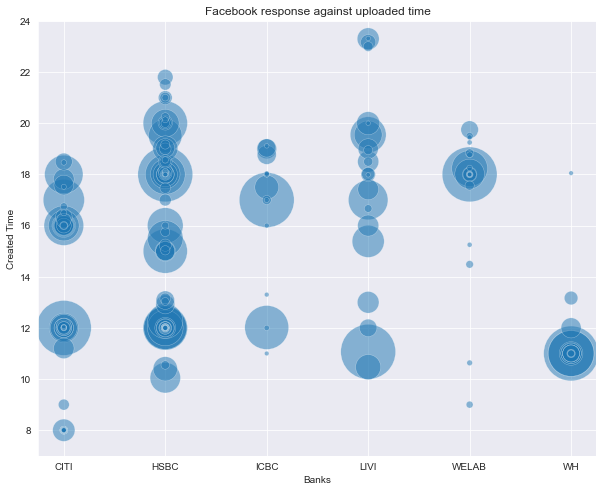

In [260]:
# Time distribution
title = "Facebook response against uploaded time"
plt.rcParams['figure.figsize'] = [10, 8]

# data = df[cols_basic_info + cols_business_segments]
sns.scatterplot(data=df, x="bank", y="hour_time", size="Popularity", legend=True, alpha=0.5, sizes=(20, 3000))
plt.ylim(7, 24)
plt.xlabel("Banks")
plt.ylabel("Created Time")
plt.title(title)
sns.set_style('darkgrid')

# plt.savefig(f"Visualization/title_{dt_now()}.png")
# sns.plt.show()

In [282]:
# df.to_csv("Collected_data/Final_ALL_Facebook_Topic_CSV_v2.csv", index=False, encoding="utf_8_sig")

#### 7.2.1 Barplot

In [4]:
df = pd.read_csv("Collected_data/Final_ALL_Facebook_Topic_CSV_v2.csv", header=0)

In [5]:
df.Main_Business_Seg = df.Main_Business_Seg.map({'Credit_Cards': 'Credit Cards',
                                                'Acquisition': 'Acquisition',
                                                'WM':'Investments and WM',
                                                'Payment_and_Transfer': 'Payment and Transfer',
                                                'Investments': 'Investments and WM',
                                                'Loan': 'Loan',
                                                'Foreign_Exchange': 'FX',
                                                'Insurance': 'Insurance',
                                                'Branch': 'Others',
                                                'Deposits': 'Others',
                                                'MPF': 'Others'})

In [6]:
print(df.Main_Business_Seg.unique(), "\n")
print(df.Main_Topics.unique())

['Credit Cards' 'Acquisition' 'Investments and WM' 'Payment and Transfer'
 'Loan' 'FX' 'Insurance' 'Others'] 

['Celebrity_and_Influencers' 'Event_and_Festival' 'Rebate' 'Rewards'
 'Transport' 'Shopping_and_Entertainment' 'Lucky_Draw' 'Education'
 'Travel' 'Health_and_Wellness' 'Bill_Payment' 'Food_and_drinks'
 'Consumption_Voucher' 'Community' 'Metaverse_and_NFT' 'Award' 'Green']


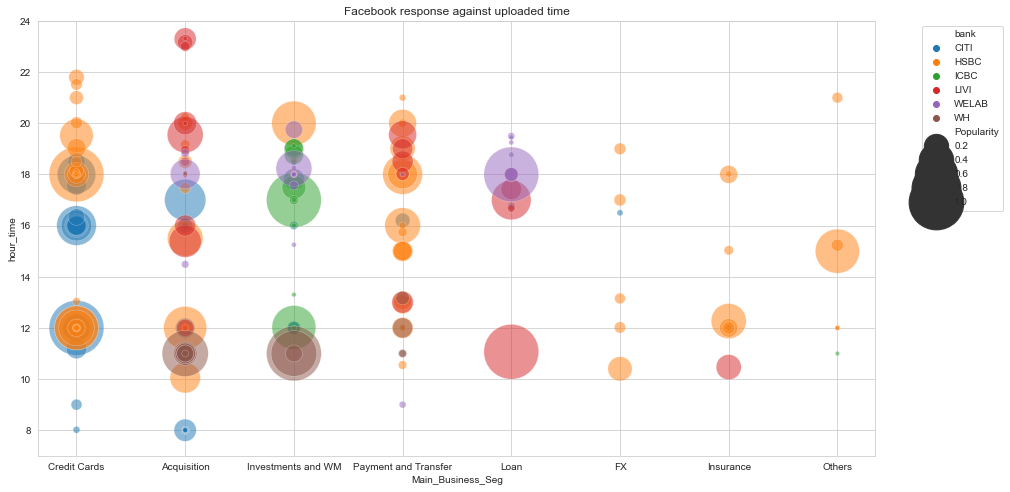

In [304]:
# Time distribution by banks and popularity
title = "Facebook response against uploaded time"
plt.rcParams['figure.figsize'] = [15, 8]

sns.set_style('whitegrid')

# data = df[cols_basic_info + cols_business_segments]
sns.scatterplot(data=df, x="Main_Business_Seg", y="hour_time", legend=True, size="Popularity", 
                hue="bank", alpha=0.5, sizes=(20, 3000))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(7, 24)
# plt.xlabel("Banks")
# plt.ylabel("Created Time")
plt.title(title)

# plt.savefig(f"Visualization/title_{dt_now()}.png")
plt.show()

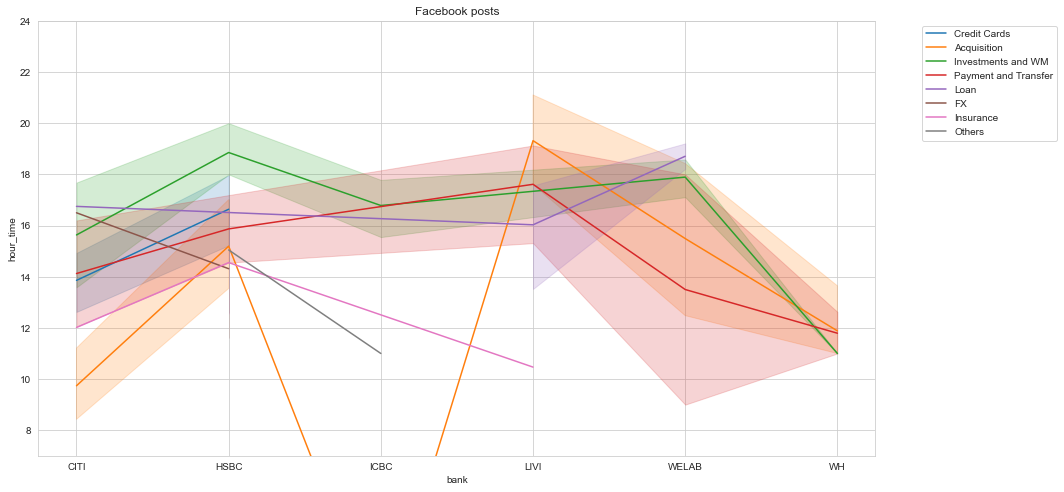

In [317]:
# Time distribution by banks and popularity
title = "Facebook posts"
plt.rcParams['figure.figsize'] = [15, 8]

sns.set_style('whitegrid')

sns.lineplot(x="bank", y="hour_time", hue="Main_Business_Seg", data=df)

# data = df[cols_basic_info + cols_business_segments]
# sns.scatterplot(data=df, x="Main_Business_Seg", y="bank", size="Popularity", 
#                 legend=True, hue="bank", 
#                 alpha=0.5, sizes=(20, 3000))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(7, 24)
# plt.xlabel("Banks")
# plt.ylabel("Created Time")
plt.title(title)

# plt.savefig(f"Visualization/{title}_{dt_now()}.png")
plt.show()

In [7]:
df.columns

Index(['bank', 'id', 'date', 'message', 'pos_reaction', 'neg_reaction',
       'shares', 'comments', 'Main_Business_Seg', 'Deposits',
       'Foreign_Exchange', 'Acquisition', 'Loan', 'Mortgages', 'Credit_Cards',
       'Investments', 'Insurance', 'Payment_and_Transfer', 'Branch', 'MPF',
       'WM', 'Main_Topics', 'Education', 'Rebate', 'Beauty', 'Lucky_Draw',
       'Travel', 'Bill_Payment', 'Food_and_drinks', 'Rewards', 'Salary',
       'Shopping_and_Entertainment', 'Transport', 'Health_and_Wellness',
       'Event_and_Festival', 'Celebrity_and_Influencers', 'Award', 'Community',
       'Green', 'Consumption_Voucher', 'Metaverse_and_NFT', 'Promotion',
       'Reminder', 'News', 'Remarks', 'hour', 'hour_time', 'Popularity'],
      dtype='object')

In [9]:
# Add Popularity
# df["Raw_Popularity"] = df.pos_reaction + df.shares + df.comments - df.neg_reaction

##### (a) Bank - Sum of Pop

In [134]:
Bus_Seg_List = df.Main_Business_Seg.unique()
print(Bus_Seg_List)

cols_pop = ['bank', 'Credit Cards', 'Acquisition', 'Investments and WM', 'Payment and Transfer',
            'Loan', 'FX', 'Insurance', 'Others']
popularity_df = pd.DataFrame(columns = cols_pop)

bank_total = ["CITI", "HSBC",'ICBC', 'LIVI', 'WELAB', 'WH']

['Credit Cards' 'Acquisition' 'Investments and WM' 'Payment and Transfer'
 'Loan' 'FX' 'Insurance' 'Others']


In [135]:
for i in range(len(bank_total)):
    
    popularity_list = list()
    popularity_list.append(bank_total[i])
    
    for j in range(len(Bus_Seg_List)):    
        
        temp_sum_pop = df.loc[(df.bank == bank_total[i]) & (df.Main_Business_Seg == Bus_Seg_List[j]), "Raw_Popularity"].mean()
        popularity_list.append(temp_sum_pop)
        
    popularity_df.loc[len(popularity_df)] = popularity_list

In [136]:
popularity_df = popularity_df.set_index('bank')
popularity_df["Total"] = popularity_df.sum(axis=1).values
popularity_df = popularity_df.sort_values(by=['Total'], ascending=False).drop(columns=['Total'])
popularity_df = popularity_df.fillna(0)
display(popularity_df)

,Credit Cards,Acquisition,Investments and WM,Payment and Transfer,Loan,FX,Insurance,Others
bank,,,,,,,,
HSBC,1929.086957,1205.500000,2509.000000,1479.75,0.000000,859.4,1340.0,1645.8
CITI,1608.347826,626.473684,516.333333,440.50,276.000000,242.0,231.0,0.0
WH,0.000000,339.250000,1085.333333,136.75,0.000000,0.0,0.0,0.0
ICBC,0.000000,17.000000,605.133333,0.00,0.000000,0.0,0.0,13.0
WELAB,0.000000,150.500000,121.555556,26.50,285.714286,0.0,0.0,0.0
LIVI,0.000000,69.000000,0.000000,76.80,125.000000,0.0,91.0,0.0


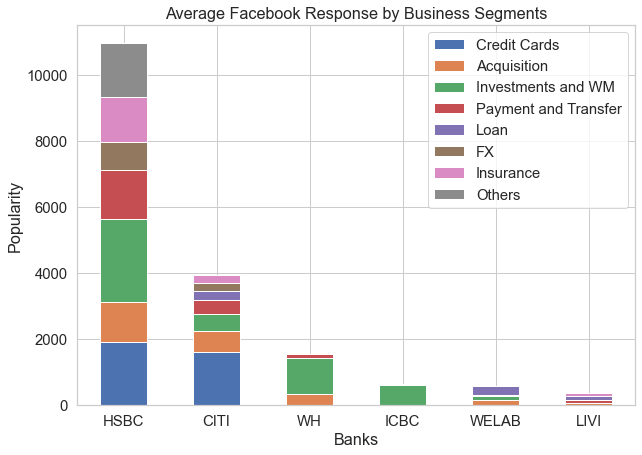

In [138]:
#Sum of response
title = "Facebook Response by Business Segments"
plt.rcParams['figure.figsize'] = [10, 7]

sns.set(font_scale=1.35)
sns.set_style('whitegrid')

popularity_df.plot(kind='bar', stacked=True)
plt.title(title)
plt.xlabel("Banks")
plt.ylabel("Popularity")
plt.xticks(rotation=0)

# plt.savefig(f"Visualization/{title}_{dt_now()}.png")
plt.show()

##### (b) Segment - Sum of Pop

In [168]:
bus_seg_plt = popularity_df.T
bus_seg_plt['sort_val'] = popularity_df.T.sum(axis=1).values
bus_seg_plt = bus_seg_plt.sort_values(by=['sort_val'], ascending=False).drop(columns=['sort_val'])
display(bus_seg_plt)

bank,HSBC,CITI,WH,ICBC,WELAB,LIVI
Investments and WM,2509.000000,516.333333,1085.333333,605.133333,121.555556,0.0
Credit Cards,1929.086957,1608.347826,0.000000,0.000000,0.000000,0.0
Acquisition,1205.500000,626.473684,339.250000,17.000000,150.500000,69.0
Payment and Transfer,1479.750000,440.500000,136.750000,0.000000,26.500000,76.8
Insurance,1340.000000,231.000000,0.000000,0.000000,0.000000,91.0
Others,1645.800000,0.000000,0.000000,13.000000,0.000000,0.0
FX,859.400000,242.000000,0.000000,0.000000,0.000000,0.0
Loan,0.000000,276.000000,0.000000,0.000000,285.714286,125.0


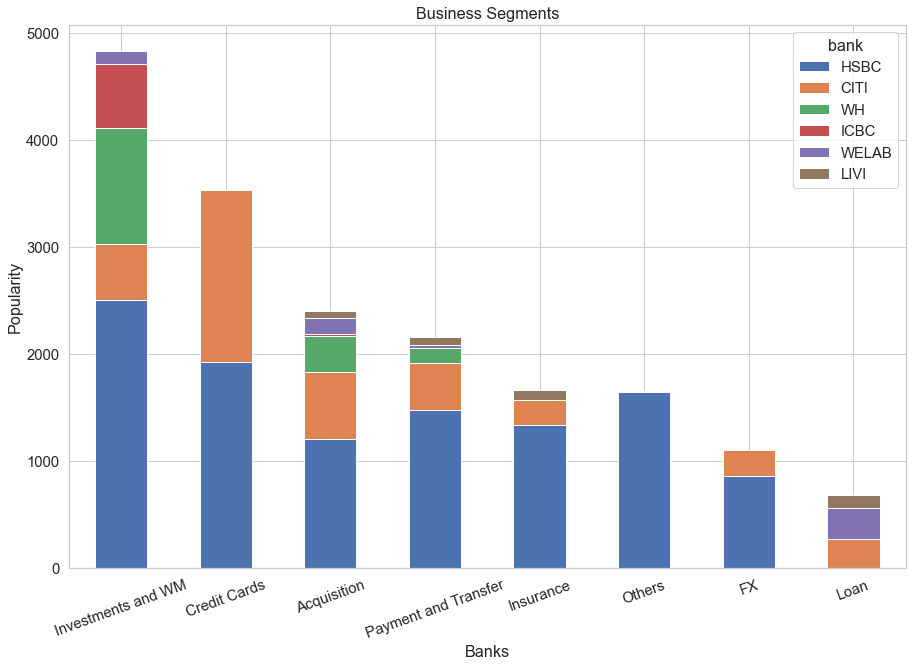

In [169]:
#Sum of response
title = "Business Segments"
plt.rcParams['figure.figsize'] = [15, 10]

sns.set(font_scale=1.35)
sns.set_style('whitegrid')

bus_seg_plt.plot(kind='bar', stacked=True)
plt.title(title)
plt.xlabel("Banks")
plt.ylabel("Popularity")
plt.xticks(rotation=20)

# plt.savefig(f"Visualization/{title}_{dt_now()}.png", bbox_inches="tight")
plt.show()

## 8. Top and Worst Posts

In [174]:
df = pd.read_csv('Collected_data/Final_ALL_Facebook.csv', header=0)
df["Raw_Popularity"] = df.pos_reaction + df.shares + df.comments - df.neg_reaction

In [179]:
data = df[df.level==1].copy().sort_values(by=['Raw_Popularity'], ascending=False).reset_index(drop=True)

In [206]:
# Top post of each bank
bank_name = data.bank.unique()
top_posts_df = pd.DataFrame(columns = data.columns)

for i in range(len(bank_name)):
    temp = data[data.bank == bank_name[i]].head(2).copy()
    top_posts_df = pd.concat([top_posts_df, temp], ignore_index=True)

In [208]:
# Worst post of each bank
bank_name = data.bank.unique()
worst_posts_df = pd.DataFrame(columns = data.columns)

for i in range(len(bank_name)):
    temp = data[data.bank == bank_name[i]].tail(2).copy()
    worst_posts_df = pd.concat([worst_posts_df, temp], ignore_index=True)

# (1) Screen-cap worst posts

# (2) Use SnowNLP to label ALL comments

# (3) Try Hugging Face, Train and Evaluate

In [214]:
worst_posts_df

,bank,level,id,parent_id,date,author,created_time,message,pos_reaction,neg_reaction,shares,comments,Raw_Popularity
0,HSBC,1,26088,1643,2022-08-02,HSBC,2022-08-02 03:00:02+00:00,【共同為一：滙豐銀行慈善基金】 一個社會內，最強嘅力量就係團結。 滙豐向旗下滙豐銀行慈善...,43,125,3,6,-73
1,HSBC,1,26075,1643,2022-08-10,HSBC,2022-08-10 10:00:02+00:00,【成日亂使錢，搞到「荷包乾硬化」? 】 如果有一千蚊可以用嚟做咩呢？ 去擦餐勁？買小廢包...,21,146,1,18,-106
2,CITI,1,26573,26529,2022-08-11,Citi Hong Kong,2022-08-11 04:00:50+00:00,【想隨時隨地搵人解答理財問題？ Citi Mobile® App 「 Messaging 服...,6,0,0,0,6
3,CITI,1,26530,26529,2022-10-11,Citi Hong Kong,2022-10-11 08:00:01+00:00,【緊記三大貼士 慎防網絡騙案】 收到聲稱由銀行 send 嘅 SMS，要求撳 link 確...,4,0,0,1,5
4,BEA,1,25602,1205,2022-07-29,BEA 東亞銀行,2022-07-29 11:00:04+00:00,疫情仍然未退，加上環球經濟放緩，令到今年嚟港股同A股都大上大落，想做好下半年嘅部署，就快D睇...,3,1,0,0,2
5,BEA,1,25589,1205,2022-08-25,BEA 東亞銀行,2022-08-25 13:30:24+00:00,【東亞財經智庫: 拆解英鎊跌勢成因📊】 英鎊兌港元持續喺「10算」以下。英國通脹再創新高，...,2,0,0,0,2
6,SC,1,25900,1510,2022-08-22,Standard Chartered Hong Kong,2022-08-22 04:00:54+00:00,騙徒時刻伺機而動，向您設下詐騙陷阱。如欲購買物業，務必確保擁有人身份真確，並查證經紀之牌照是...,0,3,1,1,-1
7,SC,1,25893,1510,2022-09-05,Standard Chartered Hong Kong,2022-09-05 07:21:23+00:00,【SC Live每週大市焦點】 立即重溫上星期五舉行嘅【SC Live每週大市焦點】，由財...,1,3,0,0,-2
8,DBS,1,25863,1348,2022-04-12,DBS,2022-04-12 04:00:40+00:00,【 消費券發放喇！用DBS轉數快增值或繳費，尊享三重獎賞 】 想安坐家中用消費券Shop...,2,0,0,1,3
9,DBS,1,25841,1348,2022-05-06,DBS,2022-05-06 08:31:28+00:00,【 邊賺邊開箱 賞您高達10倍回贈 】 成日左計右計，買嘢點先夠抵？由即日至5月31日前，下...,3,0,0,0,3


## End